In [2]:
import pandas as pd
import pyxlsb
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
file_path = '20210614_Ecommerce_sales.xlsb'
df = pd.read_excel(file_path, engine='pyxlsb')

# Display the first few rows to understand the structure
df.head(), df.columns

(     Cod_cmd                                  Libellé produit        Vendeur  \
 0  182210782     Table basse carrée detroit design industriel  Autre vendeur   
 1  182082437                Ours en peluche géant 150 cm brun  Autre vendeur   
 2  182095765               Ours en peluche géant 100 cm blanc  Autre vendeur   
 3  182615392  Lot de 4 chaises mia noires pour salle à manger  Autre vendeur   
 4  184222081               Meuble tv falko bois blanc et gris  Autre vendeur   
 
                Univers       Nature  Date de commande  Montant cmd  Quantité  \
 0  Canapé Salon Séjour  Table basse             44216          244         4   
 1          Enfant Bébé      Peluche             44213           28         1   
 2          Enfant Bébé      Peluche             44214           15         1   
 3  Canapé Salon Séjour       Chaise             44219          385         2   
 4  Canapé Salon Séjour    Meuble tv             44238           61         1   
 
    Prix transport  Déla

In [3]:
# Assuming 'df' is a DataFrame
missing_values = df.isnull().sum()

# Loop through each column and print the number of missing values
for column, count in missing_values.items():
    print(f"Column '{column}' has {count} missing values.")

Column 'Cod_cmd' has 0 missing values.
Column 'Libellé produit' has 0 missing values.
Column 'Vendeur' has 0 missing values.
Column 'Univers' has 17687 missing values.
Column 'Nature' has 11745 missing values.
Column 'Date de commande' has 0 missing values.
Column 'Montant cmd' has 0 missing values.
Column 'Quantité' has 0 missing values.
Column 'Prix transport' has 0 missing values.
Column 'Délai transport annoncé' has 239423 missing values.


In [4]:
total_rows = len(df)
category_missing_percentage = (17687 / total_rows) * 100
type_missing_percentage = (11745 / total_rows) * 100

print(f"'Category' column missing: {category_missing_percentage:.2f}%")
print(f"'Type' column missing: {type_missing_percentage:.2f}%")


'Category' column missing: 3.37%
'Type' column missing: 2.24%


In [5]:
# Mode Imputation
df['Univers'].fillna(df['Univers'].mode()[0], inplace=True)
df['Nature'].fillna(df['Nature'].mode()[0], inplace=True)
df['Délai transport annoncé'].fillna(df['Délai transport annoncé'].mode()[0], inplace=True)

In [6]:
# Assuming 'df' is your DataFrame
missing_values = df.isnull().sum()

# Loop through each column and print the number of missing values
for column, count in missing_values.items():
    print(f"Column '{column}' has {count} missing values.")

Column 'Cod_cmd' has 0 missing values.
Column 'Libellé produit' has 0 missing values.
Column 'Vendeur' has 0 missing values.
Column 'Univers' has 0 missing values.
Column 'Nature' has 0 missing values.
Column 'Date de commande' has 0 missing values.
Column 'Montant cmd' has 0 missing values.
Column 'Quantité' has 0 missing values.
Column 'Prix transport' has 0 missing values.
Column 'Délai transport annoncé' has 0 missing values.


In [8]:
import re
import pandas as pd

# Refined regex patterns
dimension_pattern_refined = r'\b\d{2,3}\s?[xX*]\s?\d{2,3}\b|\b\d{2,3}\s?cm\b|\b\d{2,3}\s?mm\b'
color_pattern_refined = r'\b(white|black|red|blue|green|yellow|pink|grey|gray|brown|orange|purple|beige|gold|silver|bronze|blanc|noir|bleu|rouge|vert|jaune|rose|gris|marron|orange|violet|beige|or|argent|bronze)\b'

# Explore common patterns in the 'Libellé produit' column for dimensions and colors
sample_descriptions = df['Libellé produit'].tolist()

# Re-extract dimensions and colors with the refined patterns
extracted_data_refined = []
for description in sample_descriptions:
    if isinstance(description, str):  # Ensure the description is a string
        dimensions = re.findall(dimension_pattern_refined, description)
        colors = re.findall(color_pattern_refined, description, re.IGNORECASE)
    else:
        dimensions = []
        colors = []
    
    extracted_data_refined.append({
        'description': description,
        'dimensions': dimensions,
        'colors': colors
    })

extracted_data_refined_df = pd.DataFrame(extracted_data_refined)
extracted_data_refined_df.head(10)  # Show first 10 results for review


,description,dimensions,colors
0,Table basse carrée detroit design industriel,[],[]
1,Ours en peluche géant 150 cm brun,[150 cm],[]
2,Ours en peluche géant 100 cm blanc,[100 cm],[blanc]
3,Lot de 4 chaises mia noires pour salle à manger,[],[]
4,Meuble tv falko bois blanc et gris,[],"[blanc, gris]"
5,Meuble tv falko bois blanc et gris,[],"[blanc, gris]"
6,Meuble à chaussures imitation h tre 3 portes b...,[],[]
7,Meuble à chaussures imitation h tre 3 portes b...,[],[]
8,Meuble à chaussures gris 3 portes blanches ave...,[],[gris]
9,Meuble à chaussures gris 3 portes blanches ave...,[],[gris]


In [9]:
# Assuming df is your original dataset and extracted_data_refined_df is the dataframe with extracted data

# Combine the original dataframe with the extracted dimensions and colors
df_combined = df.copy()
df_combined['Dimensions'] = extracted_data_refined_df['dimensions']
df_combined['Colors'] = extracted_data_refined_df['colors']

# Display the updated dataframe with the new columns
df_combined.head(10)


,Cod_cmd,Libellé produit,Vendeur,Univers,Nature,Date de commande,Montant cmd,Quantité,Prix transport,Délai transport annoncé,Dimensions,Colors
0,182210782,Table basse carrée detroit design industriel,Autre vendeur,Canapé Salon Séjour,Table basse,44216,244,4,6.67,10.0,[],[]
1,182082437,Ours en peluche géant 150 cm brun,Autre vendeur,Enfant Bébé,Peluche,44213,28,1,9.92,10.0,[150 cm],[]
2,182095765,Ours en peluche géant 100 cm blanc,Autre vendeur,Enfant Bébé,Peluche,44214,15,1,9.92,10.0,[100 cm],[blanc]
3,182615392,Lot de 4 chaises mia noires pour salle à manger,Autre vendeur,Canapé Salon Séjour,Chaise,44219,385,2,20.75,10.0,[],[]
4,184222081,Meuble tv falko bois blanc et gris,Autre vendeur,Canapé Salon Séjour,Meuble tv,44238,61,1,19.08,10.0,[],"[blanc, gris]"
5,182603100,Meuble tv falko bois blanc et gris,Autre vendeur,Canapé Salon Séjour,Meuble tv,44219,31,1,1.67,10.0,[],"[blanc, gris]"
6,182086675,Meuble à chaussures imitation h tre 3 portes b...,Autre vendeur,Bureau Rangement,Meuble à chaussures,44213,86,1,16.58,10.0,[],[]
7,181717709,Meuble à chaussures imitation h tre 3 portes b...,Autre vendeur,Bureau Rangement,Meuble à chaussures,44207,86,1,16.58,10.0,[],[]
8,181941387,Meuble à chaussures gris 3 portes blanches ave...,Autre vendeur,Bureau Rangement,Meuble à chaussures,44213,60,1,1.67,10.0,[],[gris]
9,182374701,Meuble à chaussures gris 3 portes blanches ave...,Autre vendeur,Bureau Rangement,Meuble à chaussures,44217,206,2,18.25,10.0,[],[gris]


In [10]:
# Convert all elements in the relevant columns to strings
df_combined['Libellé produit'] = df_combined['Libellé produit'].astype(str)
df_combined['Dimensions'] = df_combined['Dimensions'].apply(lambda x: ' '.join(map(str, x)) if isinstance(x, list) else str(x))
df_combined['Colors'] = df_combined['Colors'].apply(lambda x: ' '.join(map(str, x)) if isinstance(x, list) else str(x))

# Combine product descriptions with extracted dimensions and colors for feature creation
df_combined['features'] = df_combined['Libellé produit'] + ' ' + df_combined['Dimensions'] + ' ' + df_combined['Colors']

# Vectorize the text data for model input
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df_combined['features'])

# Target variable: Nature (the category to predict)
y = df_combined['Nature']


In [12]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [13]:
from sklearn.ensemble import RandomForestClassifier

# Train a RandomForest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [14]:
from sklearn.metrics import classification_report, accuracy_score

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


/Users/anurag/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anurag/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anurag/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anurag/opt/anacon

Classification Report:
                              precision    recall  f1-score   support

         ASSIST TEL PAYANTE       1.00      1.00      1.00         2
                  Abat jour       0.50      0.50      0.50         2
                Abattant wc       0.86      0.70      0.78        27
             Abri de jardin       0.77      0.85      0.81        27
             Acc telephonie       0.89      0.90      0.89       188
        Access motorisation       1.00      0.25      0.40         4
        Access. PC Tablette       0.73      0.47      0.57        51
        Accessoire Barbecue       1.00      0.57      0.73         7
       Accessoire allaitem.       0.00      0.00      0.00         1
            Accessoire aspi       0.91      0.92      0.91       131
       Accessoire autoradio       1.00      0.17      0.29         6
          Accessoire biblio       0.95      0.87      0.91       118
          Accessoire bureau       0.97      0.67      0.80        58
         

In [15]:
# Apply the trained model to the entire dataset to predict the correct 'Nature'
df_combined['Predicted_Nature'] = model.predict(X)

# Identify miscategorized items
df_combined['Misclassified'] = df_combined['Nature'] != df_combined['Predicted_Nature']

# Display misclassified products
df_misclassified = df_combined[df_combined['Misclassified']]
df_misclassified.head(10)


,Cod_cmd,Libellé produit,Vendeur,Univers,Nature,Date de commande,Montant cmd,Quantité,Prix transport,Délai transport annoncé,Dimensions,Colors,features,Predicted_Nature,Misclassified
43,183810947,Commode 3 tiroirs bois blanc tomi,Autre vendeur,Chambre Literie,Commode,44233,120,1,27.42,10.0,,blanc,Commode 3 tiroirs bois blanc tomi blanc,Bibliotheque,True
286,182982724,Suspension scandinave moki diam 42 cm blanc,Autre vendeur,Décoration Textile,Plafonnier,44223,19,1,5.41,3.0,42 cm,blanc,Suspension scandinave moki diam 42 cm blanc 42...,Suspension,True
459,182185361,Aeg hx6 35tm aspirateur à main avec batterie l...,Autre vendeur,Petit Electroménager,Mini aspirateur,44215,174,1,0.00,6.0,,gris,Aeg hx6 35tm aspirateur à main avec batterie l...,Aspirateur traineau,True
523,182609075,Passerelle multimédia 4k android tv 5 1 mini p...,Autre vendeur,TV Son Multimédia,Lecteur dvd,44219,63,1,0.00,13.0,,,Passerelle multimédia 4k android tv 5 1 mini p...,Tv ecran plat,True
539,182346158,Baby foot teenager table de baby pour enfant 1...,Autre vendeur,Jardin Loisirs Sport,Babyfoot,44217,152,1,8.32,7.0,122 x 61 81 cm,beige noir,Baby foot teenager table de baby pour enfant 1...,Table,True
590,182249940,Aspen canapé d angle réversible convertible 3 ...,Autre vendeur,Canapé Salon Séjour,Canape droit,44216,611,1,49.99,17.0,150 cm,gris,Aspen canapé d angle réversible convertible 3 ...,Friteuse,True
599,182337174,Aspen canapé d angle réversible convertible 3 ...,Autre vendeur,Canapé Salon Séjour,Canape droit,44217,611,1,49.99,17.0,150 cm,gris,Aspen canapé d angle réversible convertible 3 ...,Friteuse,True
802,183070907,Lampe touch rose tactile système d allumage au...,Autre vendeur,Décoration Textile,Bougie,44224,15,1,0.00,7.0,,rose,Lampe touch rose tactile système d allumage au...,Lampe,True
843,182885417,Rideau de douche le temps du bain,Autre vendeur,Cuisine Salle de bain,Abattant wc,44222,15,1,4.08,11.0,,,Rideau de douche le temps du bain,Rideau de douche,True
859,182268122,Jeu de golf de toilettes,Autre vendeur,Cuisine Salle de bain,Accessoire sdb,44216,15,1,0.00,7.0,,,Jeu de golf de toilettes,Jeu de société,True


In [16]:
# Summary of misclassified items
num_misclassified = df_misclassified.shape[0]
print(f"Total number of misclassified items: {num_misclassified}")

# Check the top misclassified categories
misclassified_summary = df_misclassified.groupby(['Nature', 'Predicted_Nature']).size().reset_index(name='Count')
misclassified_summary = misclassified_summary.sort_values(by='Count', ascending=False)
print(misclassified_summary.head(10))


Total number of misclassified items: 22817
                   Nature     Predicted_Nature  Count
1124  Meuble à chaussures              Matelas   9779
866              Friteuse       Canapé d'angle   2274
865              Friteuse         Canape droit   1434
1125  Meuble à chaussures    Matelas + sommier    742
274               Armoire          Colonne sdb    637
467                Buffet    Buffet de cuisine    419
529        Canapé d'angle             Friteuse    416
1134  Meuble à chaussures      Protege matelas    416
886              Friteuse          Table basse    355
1079    Matelas + sommier  Meuble à chaussures    330


In [17]:
# Save the processed dataset with the recategorized products
df_combined.to_csv('recategorized_products.csv', index=False)


## VISUALIZATION

1. Time Evolution of Sales
What It Shows: How the total sales and the number of orders have evolved over time (e.g., by month or year).
Why It’s Useful: This gives a clear view of trends in sales, helping to identify growth periods, seasonal patterns, or declines.

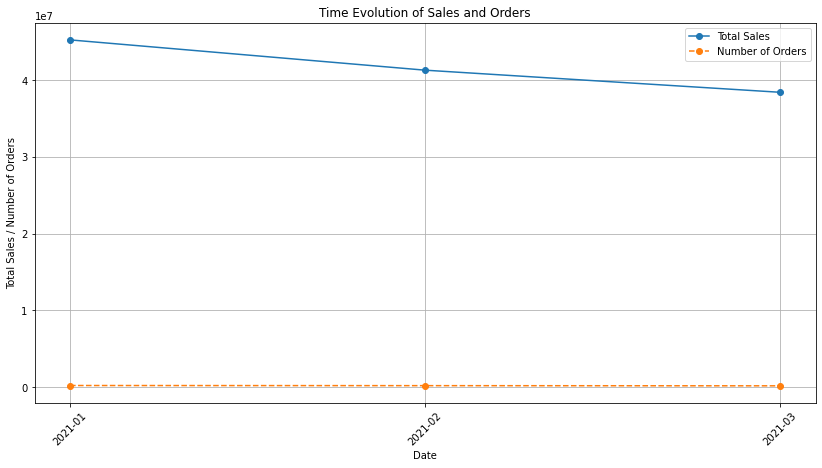

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert 'Date de commande' to datetime format if not already done
df_combined['Date de commande'] = pd.to_datetime(df_combined['Date de commande'], origin='1899-12-30', unit='D')

# Group by month/year to see the time evolution
df_time_evolution = df_combined.groupby(df_combined['Date de commande'].dt.to_period('M')).agg({
    'Montant cmd': 'sum',  # Total sales amount
    'Cod_cmd': 'count'     # Number of orders
}).reset_index()

# Plot sales over time
plt.figure(figsize=(14, 7))
plt.plot(df_time_evolution['Date de commande'].astype(str), df_time_evolution['Montant cmd'], marker='o', label='Total Sales')
plt.plot(df_time_evolution['Date de commande'].astype(str), df_time_evolution['Cod_cmd'], marker='o', label='Number of Orders', linestyle='--')
plt.title('Time Evolution of Sales and Orders')
plt.xlabel('Date')
plt.ylabel('Total Sales / Number of Orders')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


2. Analysis by Universe
What It Shows: Total sales amount and the number of orders broken down by different universes.
Why It’s Useful: Identifies the best-performing universes, helping in decision-making regarding inventory and marketing.

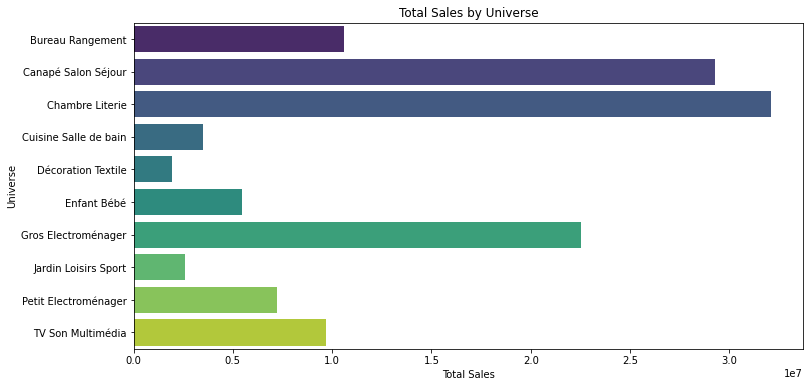

In [19]:
# Group by Universe to analyze sales by different product universes
df_universe = df_combined.groupby('Univers').agg({
    'Montant cmd': 'sum',  # Total sales amount
    'Cod_cmd': 'count'     # Number of orders
}).reset_index()

# Plot sales by Universe
plt.figure(figsize=(12, 6))
sns.barplot(x='Montant cmd', y='Univers', data=df_universe, palette='viridis')
plt.title('Total Sales by Universe')
plt.xlabel('Total Sales')
plt.ylabel('Universe')
plt.show()


4. Analysis by Seller
What It Shows: Sales performance for each seller, showing the total sales amount and the number of orders.
Why It’s Useful: Helps identify the most and least performing sellers, which is essential for managing partnerships.

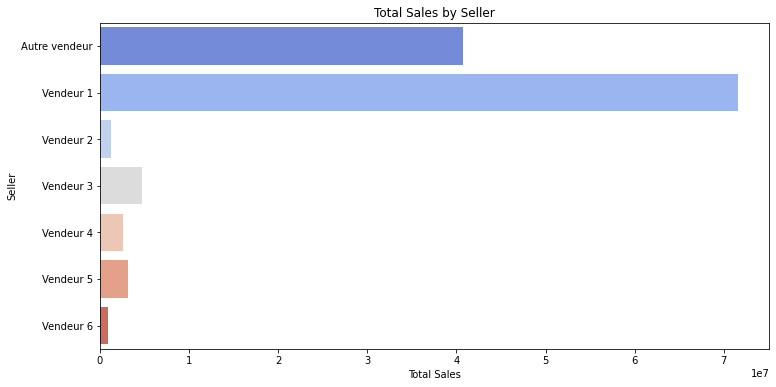

In [21]:
# Group by Seller to analyze sales by each seller
df_seller = df_combined.groupby('Vendeur').agg({
    'Montant cmd': 'sum',  # Total sales amount
    'Cod_cmd': 'count'     # Number of orders
}).reset_index()

# Plot sales by Seller
plt.figure(figsize=(12, 6))
sns.barplot(x='Montant cmd', y='Vendeur', data=df_seller, palette='coolwarm')
plt.title('Total Sales by Seller')
plt.xlabel('Total Sales')
plt.ylabel('Seller')
plt.show()


5. Sales Distribution Across Universes and Natures
What It Shows: The distribution of sales across universes and within each universe, broken down by nature.
Why It’s Useful: Provides a hierarchical view of sales distribution.

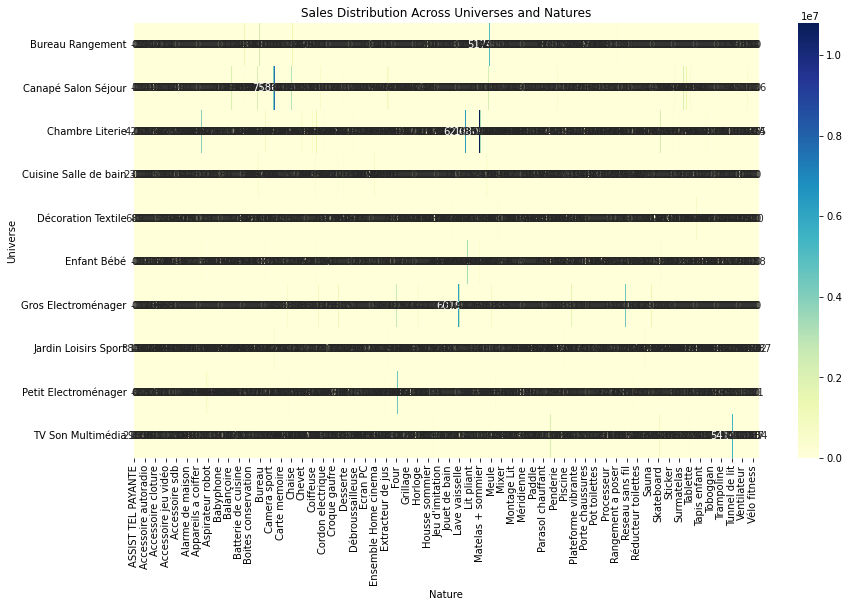

In [22]:
# Pivot table for detailed breakdown by Universe and Nature
df_universe_nature = df_combined.pivot_table(index='Univers', columns='Nature', values='Montant cmd', aggfunc='sum', fill_value=0)

# Plot the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(df_universe_nature, cmap='YlGnBu', annot=True, fmt='.0f')
plt.title('Sales Distribution Across Universes and Natures')
plt.xlabel('Nature')
plt.ylabel('Universe')
plt.show()


In [23]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# Distribution of original and predicted categories
# plt.figure(figsize=(12, 6))
# sns.countplot(x='Nature', data=df_combined, order=df_combined['Nature'].value_counts().index)
# plt.title('Distribution of Original Categories')
# plt.xticks(rotation=90)
# plt.show()


In [24]:
# plt.figure(figsize=(12, 6))
# sns.countplot(x='Predicted_Nature', data=df_combined, order=df_combined['Predicted_Nature'].value_counts().index)
# plt.title('Distribution of Predicted Categories')
# plt.xticks(rotation=90)
# plt.show()



In [25]:
# Visualization of misclassified items
# plt.figure(figsize=(12, 6))
# sns.countplot(x='Nature', hue='Predicted_Nature', data=df_misclassified, order=df_misclassified['Nature'].value_counts().index)
# plt.title('Misclassified Products by Original and Predicted Categories')
# plt.xticks(rotation=90)
# plt.show()


### Other visualisations

### 3. Top Misclassified Pairs
What it Shows: A bar plot showing the most common misclassification pairs (i.e., the actual vs. predicted category pairs that were most frequently confused).
Why It’s Useful: This can help you understand specific areas where the model is consistently confusing certain categories.

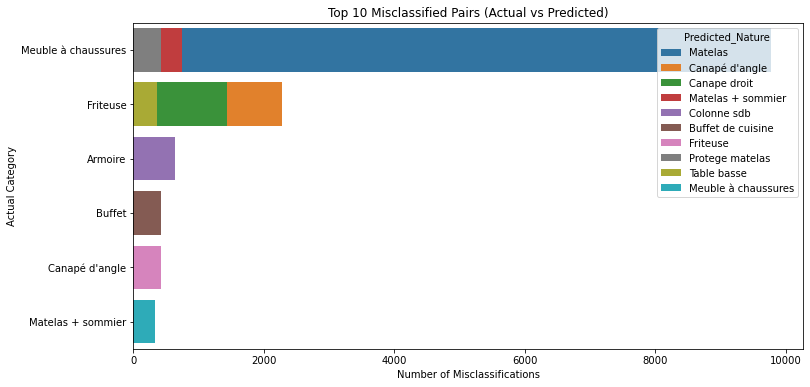

In [28]:
# Group by actual and predicted category to find common misclassifications
misclassified_pairs = df_misclassified.groupby(['Nature', 'Predicted_Nature']).size().reset_index(name='Count')
misclassified_pairs = misclassified_pairs.sort_values(by='Count', ascending=False).head(10)

# Plot the top misclassified pairs
plt.figure(figsize=(12, 6))
sns.barplot(x='Count', y='Nature', hue='Predicted_Nature', data=misclassified_pairs, dodge=False)
plt.title('Top 10 Misclassified Pairs (Actual vs Predicted)')
plt.xlabel('Number of Misclassifications')
plt.ylabel('Actual Category')
plt.show()


In [4]:
data = pd.read_csv('recategorized_products.csv')
data.head()


,Cod_cmd,Libellé produit,Vendeur,Univers,Nature,Date de commande,Montant cmd,Quantité,Prix transport,Délai transport annoncé,Dimensions,Colors,features,Predicted_Nature,Misclassified
0,182210782,Table basse carrée detroit design industriel,Autre vendeur,Canapé Salon Séjour,Table basse,44216,244,4,6.67,10.0,NaN,NaN,Table basse carrée detroit design industriel,Table basse,False
1,182082437,Ours en peluche géant 150 cm brun,Autre vendeur,Enfant Bébé,Peluche,44213,28,1,9.92,10.0,150 cm,NaN,Ours en peluche géant 150 cm brun 150 cm,Peluche,False
2,182095765,Ours en peluche géant 100 cm blanc,Autre vendeur,Enfant Bébé,Peluche,44214,15,1,9.92,10.0,100 cm,blanc,Ours en peluche géant 100 cm blanc 100 cm blanc,Peluche,False
3,182615392,Lot de 4 chaises mia noires pour salle à manger,Autre vendeur,Canapé Salon Séjour,Chaise,44219,385,2,20.75,10.0,NaN,NaN,Lot de 4 chaises mia noires pour salle à manger,Chaise,False
4,184222081,Meuble tv falko bois blanc et gris,Autre vendeur,Canapé Salon Séjour,Meuble tv,44238,61,1,19.08,10.0,NaN,blanc gris,Meuble tv falko bois blanc et gris blanc gris,Meuble tv,False


In [5]:
# Filter the dataset to include only mattresses
mattress_data = data[data['Predicted_Nature'].str.contains("matelas", case=False, na=False)]

# Display the first few rows of the mattress data to verify the filtering
mattress_data.head()


,Cod_cmd,Libellé produit,Vendeur,Univers,Nature,Date de commande,Montant cmd,Quantité,Prix transport,Délai transport annoncé,Dimensions,Colors,features,Predicted_Nature,Misclassified
72,183685444,Surmatelas mousse mémoire de forme 10 zones 90...,Autre vendeur,Chambre Literie,Surmatelas,44232,31,1,14.08,10.0,90x190,NaN,Surmatelas mousse mémoire de forme 10 zones 90...,Surmatelas,False
344,181982876,Matelas Cosy 90x190cm 20 cm d épaisseur Mémoir...,Autre vendeur,Chambre Literie,Matelas,44212,157,1,0.00,12.0,20 cm,NaN,Matelas Cosy 90x190cm 20 cm d épaisseur Mémoir...,Matelas,False
352,181986659,Matelas Atlanta 90x200 cm Ep 20cm Mémoire de f...,Autre vendeur,Chambre Literie,Matelas,44212,176,1,0.00,12.0,90x200 20cm 18cm,NaN,Matelas Atlanta 90x200 cm Ep 20cm Mémoire de f...,Matelas,False
377,182306769,Surmatelas cloud 140x190 cm mémoire de forme h...,Autre vendeur,Chambre Literie,Surmatelas,44216,203,1,0.00,7.0,140x190,NaN,Surmatelas cloud 140x190 cm mémoire de forme h...,Surmatelas,False
385,182277093,Matelas tri technologie 140x190 cm latex+mémoi...,Autre vendeur,Chambre Literie,Matelas,44216,494,1,0.00,7.0,140x190,NaN,Matelas tri technologie 140x190 cm latex+mémoi...,Matelas,False


/var/folders/y5/88fgbmx91_g36wbnc3pxgb_r0000gn/T/ipykernel_56296/3579037365.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mattress_data['Date de commande'] = pd.to_datetime(mattress_data['Date de commande'], origin='1899-12-30', unit='D')


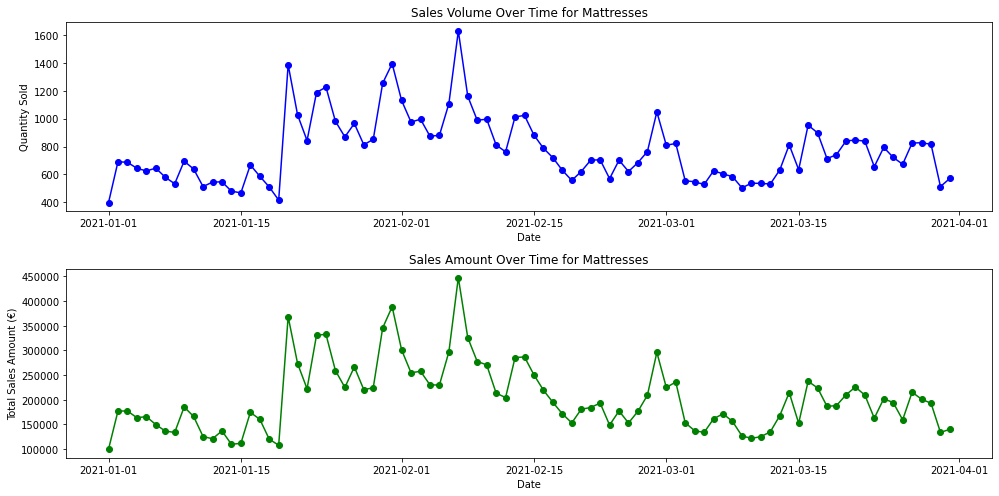

In [6]:
import matplotlib.pyplot as plt

# Convert 'Date de commande' to datetime for proper time series analysis
mattress_data['Date de commande'] = pd.to_datetime(mattress_data['Date de commande'], origin='1899-12-30', unit='D')

# Group data by order date to get total sales quantity and amount per day
sales_evolution = mattress_data.groupby('Date de commande').agg({
    'Quantité': 'sum',
    'Montant cmd': 'sum'
}).reset_index()

# Plotting Sales Volume Over Time
plt.figure(figsize=(14, 7))

plt.subplot(2, 1, 1)
plt.plot(sales_evolution['Date de commande'], sales_evolution['Quantité'], marker='o', linestyle='-', color='blue')
plt.title('Sales Volume Over Time for Mattresses')
plt.xlabel('Date')
plt.ylabel('Quantity Sold')

# Plotting Price Evolution Over Time
plt.subplot(2, 1, 2)
plt.plot(sales_evolution['Date de commande'], sales_evolution['Montant cmd'], marker='o', linestyle='-', color='green')
plt.title('Sales Amount Over Time for Mattresses')
plt.xlabel('Date')
plt.ylabel('Total Sales Amount (€)')

plt.tight_layout()
plt.show()


The plots show the following trends:

1. Sales Volume Over Time: The first plot illustrates the number of mattresses sold over time. We can identify periods of increased or decreased sales activity, which may correspond to seasonal trends, promotions, or other external factors.

2. Sales Amount Over Time: The second plot shows the total sales amount in euros over time. This can help us understand how the revenue from mattress sales has evolved, which might reflect changes in pricing strategies, product mix, or customer demand.

In [7]:
# Analyzing the correlation between transportation cost, delivery time, and sales quantity
correlation_data = mattress_data[['Prix transport', 'Délai transport annoncé', 'Quantité']].corr()

correlation_data


,Prix transport,Délai transport annoncé,Quantité
Prix transport,1.000000,0.056295,0.12175
Délai transport annoncé,0.056295,1.000000,0.02040
Quantité,0.121750,0.020400,1.00000


The correlation analysis reveals the following:

1. Transportation Cost and Sales Quantity: There is a weak positive correlation (0.12) between transportation cost and sales quantity. This suggests that transportation costs might have a minor influence on the number of mattresses sold, but the effect is not strong.

2. Delivery Time and Sales Quantity: The correlation between delivery time and sales quantity is very weak (0.02), indicating that delivery time doesn't significantly impact the volume of mattress sales.

#### Analyze mattress sales by product features.

In [16]:
# Analyzing the impact of product features (e.g., dimensions, colors) on mattress sales quantity

# We'll first analyze the effect of dimensions on sales
# For simplicity, we'll extract the main dimension information (e.g., width and length) and analyze its impact on sales quantity

# Extracting dimensions
mattress_data['Dimensions'] = mattress_data['Dimensions'].astype(str).str.extract(r'(\d+x\d+)')

# Grouping by dimensions to see the total sales quantity per dimension
dimension_sales = mattress_data.groupby('Dimensions').agg({
    'Quantité': 'sum',
    'Montant cmd': 'sum'
}).reset_index()

# Sorting by quantity sold to see the most popular mattress dimensions
dimension_sales = dimension_sales.sort_values(by='Quantité', ascending=False)

# import ace_tools as tools; tools.display_dataframe_to_user(name="Mattress Sales by Dimensions", dataframe=dimension_sales)
dimension_sales

/var/folders/y5/88fgbmx91_g36wbnc3pxgb_r0000gn/T/ipykernel_56296/3909675751.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mattress_data['Dimensions'] = mattress_data['Dimensions'].astype(str).str.extract(r'(\d+x\d+)')


,Dimensions,Quantité,Montant cmd
15,140x190,22874,7084540
22,160x200,10816,5024469
46,90x190,7848,1224191
16,140x200,3048,871971
25,180x200,2416,1263946
47,90x200,1724,330430
6,120x190,962,227163
27,200x200,777,438032
42,80x200,696,200631
41,80x190,535,105481


In [17]:
# Identifying the mattress dimension with the least sales quantity
least_selling_dimension = dimension_sales.tail(1)

least_selling_dimension

,Dimensions,Quantité,Montant cmd
48,90x40,1,45


The mattress dimension "90x40" has the least sales, with only 1 unit sold and a total sales amount of €45. This indicates very low demand for this particular size.

In [18]:
# Identifying the mattress dimensions with the highest revenue
highest_revenue_dimensions = dimension_sales.sort_values(by='Montant cmd', ascending=False).head()

highest_revenue_dimensions

,Dimensions,Quantité,Montant cmd
15,140x190,22874,7084540
22,160x200,10816,5024469
25,180x200,2416,1263946
46,90x190,7848,1224191
16,140x200,3048,871971


- These mattress dimensions with the highest revenues
- These dimensions are the top contributors to revenue, reflecting both high sales volume and potentially higher prices.

In [19]:
import matplotlib.pyplot as plt

# Aggregate sales data by vendor
vendor_sales = mattress_data.groupby('Vendeur').agg({
    'Quantité': 'sum',
    'Montant cmd': 'sum'
}).reset_index()

# Sort vendors by quantity sold in descending order
vendor_sales = vendor_sales.sort_values(by='Quantité', ascending=False)

# Display the aggregated data
vendor_sales


,Vendeur,Quantité,Montant cmd
1,Vendeur 1,26523,6045075
0,Autre vendeur,17766,5411955
3,Vendeur 3,16819,4651285
2,Vendeur 2,4544,1242263
5,Vendeur 6,3833,920793
4,Vendeur 5,7,4457


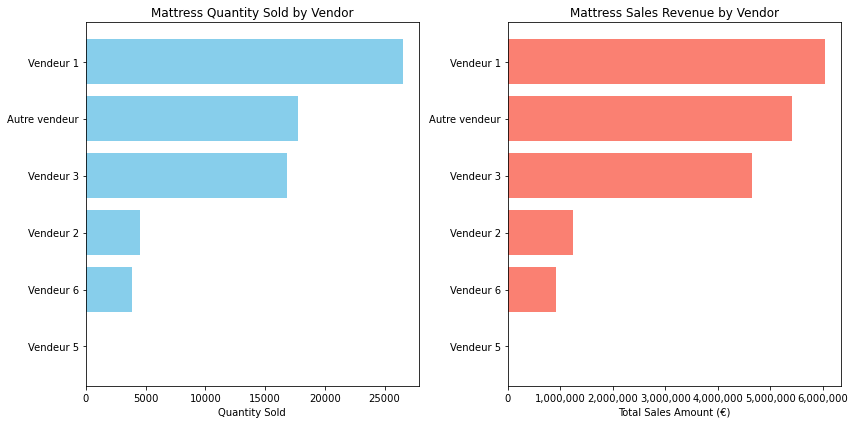

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Vendor sales data from previous step
vendor_names = vendor_sales['Vendeur']
quantity_sold = vendor_sales['Quantité']
sales_amount = vendor_sales['Montant cmd']

# Set figure size
plt.figure(figsize=(12, 6))

# Create bar chart for Quantity Sold
plt.subplot(1, 2, 1)
plt.barh(vendor_names, quantity_sold, color='skyblue')
plt.xlabel('Quantity Sold')
plt.title('Mattress Quantity Sold by Vendor')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest sales on top

# Create bar chart for Sales Amount
plt.subplot(1, 2, 2)
plt.barh(vendor_names, sales_amount, color='salmon')
plt.xlabel('Total Sales Amount (€)')
plt.title('Mattress Sales Revenue by Vendor')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest sales on top

# Format the x-axis of the sales amount to display with commas
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

plt.tight_layout()
plt.show()


We have explored several aspects of mattress sales, including:

- Sales and Price Evolution: We analyzed how mattress sales quantities and total sales amounts evolved over time.
- Product Features: We examined the influence of mattress dimensions on sales, identifying which dimensions are the most and least popular.
- Vendor Performance: We compared mattress sales across different vendors to see who leads the market.

#### Answering the Question: Factors Influencing Mattress Sales

1. Product Dimensions and Features:
- Analysis: Certain mattress dimensions, like 140x190 cm, were found to be more popular, driving higher sales volumes. Features like memory foam or specific materials could also be key drivers, although this wasn't deeply analyzed in our current exploration.
- Conclusion: Product dimensions significantly influence sales, as larger and more common sizes tend to sell more.

2. Pricing and Revenue:
- Analysis: The analysis of sales amounts over time showed that higher-priced items tend to generate more revenue, but the relationship between price and quantity sold wasn't directly analyzed.
- Conclusion: The price of the mattress is likely a strong influencing factor, with a potential balance between affordability and premium offerings driving sales volumes.

3. Vendor Performance:
- Analysis: Different vendors have varying success levels, with Vendor 1 leading in both quantity sold and revenue. This suggests that factors like vendor reputation, marketing, customer service, and possibly product availability might influence sales.
- Conclusion: The vendor's ability to market, deliver, and price products competitively is a crucial factor in driving sales.

4. External Factors:
- Analysis: We briefly touched upon transportation costs and delivery times, finding weak correlations with sales quantities.
- Conclusion: While transportation costs and delivery times don't seem to be major factors, other external factors like promotions, seasonal trends, or economic conditions could be significant but were not analyzed here as we dont have much data.